<a href="https://colab.research.google.com/github/beckman9191/APS1070-Foundations-of-Data-Analytics-and-Machine-Learning/blob/main/APS1070_Project_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project 2**, APS1070 Fall 2023
**Anomaly Detection Algorithm using Gaussian Mixture Model**

**Deadline: OCT 27, 11 PM**

**Academic Integrity**

This project is individual - it is to be completed on your own. If you have questions, please post your query in the APS1070 Piazza Q&A forums (the answer might be useful to others!).

Do not share your code with others, or post your work online. Do not submit code that you have not written yourself. Students suspected of plagiarism on a project, midterm or exam will be referred to the department for formal discipline for breaches of the Student Code of Conduct.

Please fill out the following:


*   Name: Zhengnan Zhu
*   Student Number: 1005209971

### How to submit **(HTML + IPYNB)**

1. Download your notebook: `File -> Download .ipynb`

2. Click on the Files icon on the far left menu of Colab

3. Select & upload your `.ipynb` file you just downloaded, and then obtain its path (right click) (you might need to hit the Refresh button before your file shows up)


4. execute the following in a Colab cell:
```
%%shell
jupyter nbconvert --to html /PATH/TO/YOUR/NOTEBOOKFILE.ipynb
```

5. An HTML version of your notebook will appear in the files, so you can download it.

6. Submit **both** <font color='red'>`HTML` and `IPYNB`</font>  files on Quercus for grading.



Ref: https://stackoverflow.com/a/64487858



##**Part 1: Getting started [1.5 Marks]**

We are going to work with a [credit card fraud detection](https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud) dataset, consisting of transactions made by credit cards in September 2013 by European cardholders. The dataset contains only numerical input variables (`V1`, `V2`, … `V28`) which are the principal components obtained with PCA transformation (PCA will the introduced later in this course), due to confidentiality issues. The only features which have not been transformed with PCA are `Time` (seconds elapsed between each transaction and the first transaction in the dataset) and `Amount` (transaction Amount).\
This dataset contains 30 key features, which are not
directly interpretable but contain meaningful information about the dataset.
Load the dataset in CSV file using Pandas. The dataset is called `creditcard.csv`. Print out the first few columns of the dataset.

* How many rows are there?  **[0.1]**

  **284807**
* Which column contains the targets? **[0.1]**

  **Class**   

* What is the meaning of target values? **[0.2]**

  **Whether the transaction is fraud or not**

In [ ]:
pip install wget

  Preparing metadata (setup.py) ... done
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9655 sha256=3e67a8e92f69284a54040cfff6d9168b0007e792ceaa6f0934bff74dce1c954c
  Stored in directory: /root/.cache/pip/wheels/8b/f1/7f/5c94f0a7a505ca1c81cd1d9208ae2064675d97582078e6c769
Successfully built wget


In [ ]:
import wget

wget.download('https://raw.githubusercontent.com/Sabaae/Dataset/master/creditcard.csv')

'creditcard.csv'

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
df=pd.read_csv("creditcard.csv")
print(df)
print("number of rows:", str(df.shape[0]))

            Time         V1         V2        V3        V4        V5  \
0            0.0  -1.359807  -0.072781  2.536347  1.378155 -0.338321   
1            0.0   1.191857   0.266151  0.166480  0.448154  0.060018   
2            1.0  -1.358354  -1.340163  1.773209  0.379780 -0.503198   
3            1.0  -0.966272  -0.185226  1.792993 -0.863291 -0.010309   
4            2.0  -1.158233   0.877737  1.548718  0.403034 -0.407193   
...          ...        ...        ...       ...       ...       ...   
284802  172786.0 -11.881118  10.071785 -9.834783 -2.066656 -5.364473   
284803  172787.0  -0.732789  -0.055080  2.035030 -0.738589  0.868229   
284804  172788.0   1.919565  -0.301254 -3.249640 -0.557828  2.630515   
284805  172788.0  -0.240440   0.530483  0.702510  0.689799 -0.377961   
284806  172792.0  -0.533413  -0.189733  0.703337 -0.506271 -0.012546   

              V6        V7        V8        V9  ...       V21       V22  \
0       0.462388  0.239599  0.098698  0.363787  ... -0.01830

It's important to know how many examples we have for each class when we work with a new dataset.

* What is the percentage of entries in the dataset for each class?  **[0.1]**

  **the percentage of entries for fraud transaction is  0.001727485630620034**
  
  **the percentage of entries for non-fraud transaction is  0.9982725143693799**


* Is this data considered balanced or unbalanced? Why is this the case? **[0.1]**

  **It is unbalanced as there is a huge difference in number between fraud and non-fraud trasactions**


* Why is balance/imbalance important? How might this class ditribution affect a KNN classifier for example, which we explored in Project 1?  **[0.5]**

  **It is important since the unbalanced dataset might lead to high bias model. Consider KNN classifier, 99% of the data is classified as non-fraud. Therefore, a fraud transaction will have a high chance to be classified as non-fraud**
* What metrics should we use to evaluate a model in such cases **[0.2]**

  **We should use Recall (Sensitivity) to evaluate the model**


In [ ]:
total_num=df.shape[0]
num_fraud=len(df.loc[(df.Class == 1)])
num_not_fraud=len(df.loc[(df.Class == 0)])
print("the percentage of entries for fraud transaction is ", num_fraud / total_num)
print("the percentage of entries for non-fraud transaction is ", num_not_fraud / total_num)

the percentage of entries for fraud transaction is  0.001727485630620034
the percentage of entries for non-fraud transaction is  0.9982725143693799


Next, split the dataset into a training (70%), validation (15%) and testing set (15%). Set the random state to 0. **[0.2]**

Make sure to separate out the column corresponding to the targets.

In [ ]:
### Split the data  ###
X=df.iloc[:,0:30]

y=df['Class']
X_train, X_val, X_test, y_train, y_val, y_test = 0, 0, 0, 0, 0, 0
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.15, random_state=0)
X_train, X_val, y_train, y_val=train_test_split(X_train, y_train, test_size=0.15/0.85, random_state=0)
print(y_train)




182195    0
224876    0
87379     0
34141     0
212503    0
         ..
72100     0
191533    0
256582    0
49085     0
255061    0
Name: Class, Length: 199364, dtype: int64


Now, let's take a look at the difference in distribution for all variables between non-fraudulent and fraudulent credit card transactions:

Time
V1
V2
V3
V4
V5
V6
V7
V8
V9
V10
V11
V12
V13
V14
V15
V16
V17
V18
V19
V20
V21
V22
V23
V24
V25
V26
V27
V28
Amount


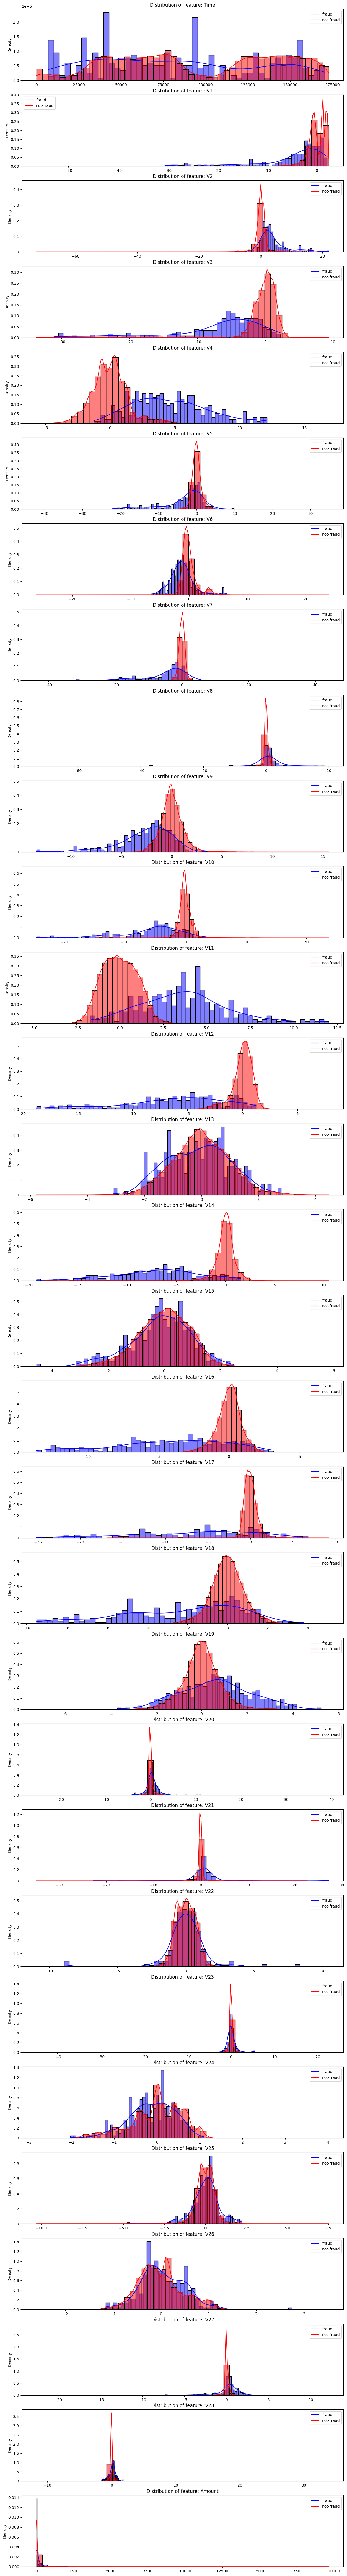

In [ ]:
import matplotlib.gridspec as gridspec
features=[f for f in df.columns if not 'Class' in f]
nplots=np.size(features)
plt.figure(figsize=(15,4*nplots))
gs = gridspec.GridSpec(nplots,1)
for i, feat in enumerate(features):
    print(feat)
    ax = plt.subplot(gs[i])
    sns.histplot(X_train[feat][y_train==1], stat="density", kde=True, color="blue", bins=50)
    sns.histplot(X_train[feat][y_train==0], stat="density", kde=True, color="red", bins=50)
    ax.legend(['fraud', 'not-fraud'],loc='best')
    ax.set_xlabel('')
    ax.set_title('Distribution of feature: ' + feat)

Explain how these graphs could provide meaningful information about anomaly detection using a gaussian model. **[0.5]**


  **These graphs can help us to understand what range the fraud transactions most likely to occur for each feature. For instance, the fraud transactions mostly occur between -2 and 2 for feature V19**

## **Part 2: Single feature model with one Gaussian distribution: [2.5 Marks]**
We'll start by making a prediction using **a single feature of our dataset at a time**.

Please note that we **only use `V` features** in our model.

**a. Fitting regardless of class:**
  1. Fit a single Gaussian distribution on a single feature of **the full training dataset** (both classes) using ``sklearn.mixture.GaussianMixture`` when ``n_components=1``.
  2. Compute AUC (Area under the ROC Curve) based on ``sklearn.mixture.GaussianMixture.score_samples`` on both the full training set and validation set (including both classes).  
  3. Repeat the above steps for each of the features and present your findings in a table.
  4. Find the best 3 features to distinguish fraud transactions from not-fraud transactions based on the AUC of the validation set. **[0.2]**
  5. Make a prediction based on a model's scores: If the `score_samples` is lower than a threshold, we consider that transaction as a fraud. Find an optimal threshold that maximizes the F1 Score of the validation set for each of those 3 features separately. (Do not check every possible value for threshold, come up with a faster way!) Compute F1 score using `sklearn.metrics.f1_score`. **[0.5]**
  6. Report the complexity of your method (Big O notation) for determining the optimal threshold.**[0.5]**

**b. Fitting based on class:**
 1. Pick 3 features that had the best AUC in Part 2a.
 2. Compute AUC and F1 score when you fit a Gaussian **only on not-fraud transactions** (instead of all the transactions).
 3. Compare your results from parts 2a and 2b (AUC and F1 score) in a table. **[0.8]**
 4. Are these results different or similar? Why?**[0.5]**





In [ ]:
from sklearn.mixture import GaussianMixture

from sklearn.metrics import roc_curve
from sklearn.metrics import auc
#Step 1: Fit a single Gaussian distribution on a single feature of the full training dataset
length=X_train.shape[1]
auc_train=[]
auc_val=[]
threshold_train_list=[]
threshold_val_list=[]

#Step 3: Repeat the above steps for each of the features and present your findings in a table
for i in range(length):
  #Step 1: Fit a single Gaussian distribution on a single feature of the full training dataset
  if i==0 or i==29:
    continue
  X_single_feature_train=np.array(X_train.iloc[:,i].values).reshape(-1,1)
  X_single_feature_val=np.array(X_val.iloc[:,i].values).reshape(-1,1)
  gm=GaussianMixture(n_components=1, random_state=0)
  gm.fit(X_single_feature_train)
  #Step 2: Compute AUC

  score_train=gm.score_samples(X_single_feature_train)

  score_val=gm.score_samples(X_single_feature_val)
  fpr_train, tpr_train, threshold_train=roc_curve(y_train, score_train*-1)
  fpr_val, tpr_val, threshold_val=roc_curve(y_val, score_val*-1)
  auc_train.append(auc(fpr_train, tpr_train))
  auc_val.append(auc(fpr_val, tpr_val))
  threshold_train_list.append(threshold_train)
  threshold_val_list.append(threshold_val)


table=pd.DataFrame({'Features':df.columns[1:-2], 'AUC_train': auc_train, 'AUC_val': auc_val})
table


,Features,AUC_train,AUC_val
0,V1,0.704715,0.731833
1,V2,0.848104,0.837961
2,V3,0.880042,0.832369
3,V4,0.894416,0.871487
4,V5,0.760907,0.816581
5,V6,0.734653,0.721507
6,V7,0.862982,0.872639
7,V8,0.772515,0.828098
8,V9,0.799795,0.820999
9,V10,0.911624,0.914375


In [ ]:
#Step 4: Find the best 3 features to distinguish fraud transactions from not-fraud
#     transactions based on the AUC of the validation set
sorted_table=table.sort_values(by=['AUC_val'], ascending=False)
top_three=sorted_table.head(3)
top_three

,Features,AUC_train,AUC_val
13,V14,0.949740,0.955297
11,V12,0.912838,0.928006
16,V17,0.927538,0.925703


The top 3 features are V14, V12 and V17

In [ ]:
def find_maximum_f1_train(threshold_range, score_list):
  f1_score_max=0
  optimal_threshold=0
  for threshold in threshold_range:
    res=[]
    for actual in score_list:
      y_val_pred=1 if actual<threshold else 0
      res.append(y_val_pred)
    f1_val=f1_score(y_train, res)
    print(res)
    if f1_val > f1_score_max:

      optimal_threshold=threshold
      f1_score_max=f1_val

  return optimal_threshold, f1_score_max


In [ ]:
def find_maximum_f1_val(threshold_range, score_list):
  f1_score_max=0
  optimal_threshold=0
  for threshold in threshold_range:
    res=[]
    for actual in score_list:
      y_val_pred=1 if actual<threshold else 0
      res.append(y_val_pred)
    f1_val=f1_score(y_val, res)
    if f1_val > f1_score_max:

      optimal_threshold=threshold
      f1_score_max=f1_val

  return optimal_threshold, f1_score_max

In [ ]:
from sklearn.metrics import f1_score
#Step 5: Make a prediction based on a model's scores
def find_optimal_threshold_a(i):
  X_part2_train=np.array(X_train.iloc[:,i].values).reshape(-1,1)
  X_part2_val=np.array(X_val.iloc[:,i].values).reshape(-1,1)
  gm=GaussianMixture(n_components=1)
  gm.fit(X_part2_train)

  part2_score_train=gm.score_samples(X_part2_train)
  part2_score_val=gm.score_samples(X_part2_val)

  sc_min=np.min(part2_score_train, axis=-1)
  sc_max=np.max(part2_score_train, axis=-1)


  possible_threshold=np.linspace(sc_min, sc_max, 100)

  f1_score_max=0
  optimal_threshold=0
  optimal_threshold, f1_score_max=find_maximum_f1_val(possible_threshold, part2_score_val)

  print("Part 2a: the optimal threshold for V", i, "is " , optimal_threshold)
  print("Part 2a: the F1 score for V", i, "is " , f1_score_max)

  return optimal_threshold, f1_score_max






In [ ]:
optimal_threshold_V14_a, f1_score_max_V14_a=find_optimal_threshold_a(14)
optimal_threshold_V12_a, f1_score_max_V12_a=find_optimal_threshold_a(12)
optimal_threshold_V17_a, f1_score_max_V17_a=find_optimal_threshold_a(17)

Part 2a: the optimal threshold for V 14 is  -21.174112099641945
Part 2a: the F1 score for V 14 is  0.6115702479338844
Part 2a: the optimal threshold for V 12 is  -11.466187139038027
Part 2a: the F1 score for V 12 is  0.6250000000000001
Part 2a: the optimal threshold for V 17 is  -13.98945942961251
Part 2a: the F1 score for V 17 is  0.5416666666666666


The complexity of determine the optimal threshold  is O(n^2)

-----------------------------------------------------------------------------------------------------------Part B-------------------------------------------------------------------------------------------------------------

In [ ]:
from sklearn.metrics import f1_score
#Step 5: Make a prediction based on a model's scores

def find_optimal_threshold_b(i):
  X_part2_train=np.array(X_train.iloc[:,i].values).reshape(-1,1)
  X_part2_val=np.array(X_val.iloc[:,i].values).reshape(-1,1)
  X_part2_train_negative=X_part2_train[y_train==0]

  auc_train_b=[]
  auc_val_b=[]

  gm=GaussianMixture(n_components=1)
  gm.fit(X_part2_train_negative)
  part2_score_train=gm.score_samples(X_part2_train)
  part2_score_val=gm.score_samples(X_part2_val)

  fpr_train_b, tpr_train_b, threshold_train_b=roc_curve(y_train, part2_score_train*-1)
  fpr_val_b, tpr_val_b, threshold_val_b=roc_curve(y_val, part2_score_val*-1)
  auc_train_b.append(auc(fpr_train_b, tpr_train_b))
  auc_val_b.append(auc(fpr_val_b, tpr_val_b))

  sc_min=np.min(part2_score_train, axis=-1)
  sc_max=np.max(part2_score_train, axis=-1)

  possible_threshold=np.linspace(sc_min, sc_max, 100)

  f1_score_max=0
  optimal_threshold=0
  optimal_threshold, f1_score_max=find_maximum_f1_val(possible_threshold, part2_score_val)

  print("Part 2b: the optimal threshold for V", i, "is " , optimal_threshold)
  print("Part 2b: the F1 score for V", i, "is " , f1_score_max)



  return optimal_threshold, f1_score_max, auc_train_b, auc_val_b


In [ ]:
optimal_threshold_V14_b, f1_score_max_V14_b, auc_train_b_V14, auc_val_b_V14=find_optimal_threshold_b(14)
optimal_threshold_V12_b, f1_score_max_V12_b, auc_train_b_V12, auc_val_b_V12=find_optimal_threshold_b(12)
optimal_threshold_V17_b, f1_score_max_V17_b, auc_train_b_V17, auc_val_b_V17=find_optimal_threshold_b(17)

Part 2b: the optimal threshold for V 14 is  -26.35091044567494
Part 2b: the F1 score for V 14 is  0.6218487394957983
Part 2b: the optimal threshold for V 12 is  -12.663328626067965
Part 2b: the F1 score for V 12 is  0.6250000000000001
Part 2b: the optimal threshold for V 17 is  -17.764342992927936
Part 2b: the F1 score for V 17 is  0.5416666666666666


In [ ]:
#final table
final_table=pd.DataFrame(columns=['Features', 'Training AUC', 'Validation AUC', 'F1 score',
                          'Training AUC(non fraud)', 'Validation AUC(non fraud)', 'F1 score(non fraud)'])

final_table['Features']=['V14', 'V12', 'V17']
final_table['Training AUC']=[auc_train[13], auc_train[11], auc_train[16]]
final_table['Validation AUC']=[auc_val[13], auc_val[11], auc_val[16]]
final_table['Training AUC(non fraud)']=[auc_train_b_V14[0], auc_train_b_V12[0], auc_train_b_V17[0]]
final_table['Validation AUC(non fraud)']=[auc_val_b_V14[0], auc_val_b_V12[0], auc_val_b_V17[0]]
final_table['F1 score']=[f1_score_max_V14_a, f1_score_max_V12_a, f1_score_max_V17_a]
final_table['F1 score(non fraud)']=[f1_score_max_V14_b, f1_score_max_V12_b, f1_score_max_V17_b]

final_table

,Features,Training AUC,Validation AUC,F1 score,Training AUC(non fraud),Validation AUC(non fraud),F1 score(non fraud)
0,V14,0.949740,0.955297,0.611570,0.949827,0.956061,0.621849
1,V12,0.912838,0.928006,0.625000,0.913610,0.928370,0.625000
2,V17,0.927538,0.925703,0.541667,0.926960,0.926476,0.541667


The results are similar as non-fraud trasactions takes up 99% of the dataset. Therefore, using non-fraud transactions will not affect the result that much.

## **Part 3: Multiple feature model with one Gaussian distribution: [1 Marks]**
This part is similar to Part 2, but we will pick multiple features and **visually** set the number of components.

  a. 2D plot:
 1. Pick two features (say, f1 and f2).
 2. Scatter plot (plt.scatter) those features on a figure (f1 on the x-axis and f2 on the y-axis).
 3. Color the data points based on their class (not-fraud blue and fraud red).
 4. Based on your plots, decide how many Gaussian components (``n_components``) you need to fit the data (focus on valid transactions). Explain.  **[0.25]**
 5. Fit your Gaussian model on all the data points.
 6. Compute AUC on both training and validation sets
 7. Pick 3 new pairs of features and repeat steps 2 to 6. **[0.25]**
 8. For each pair, find a threshold to maximize your validation set F1 Score.**[0.25]**
 9. For each pair, plot a figure similar to step 3 and put a circle around outliers based on your threshold (use the code of the similar figure in the tutorial) **[0.25]**





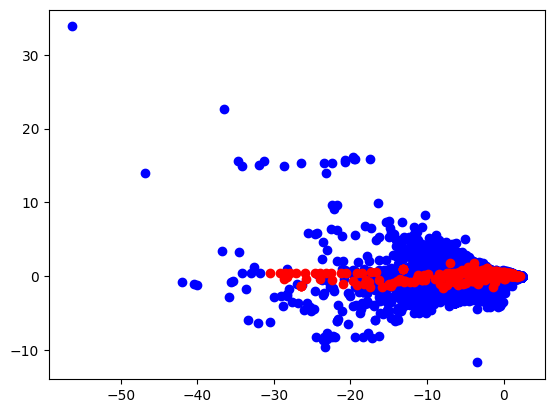

In [ ]:
#Pick V1 and V28
X_V1_train_negative=np.array(X_train.iloc[:,1][y_train==0]).reshape(-1, 1)
X_V28_train_negative=np.array(X_train.iloc[:,28][y_train==0]).reshape(-1, 1)
#print(X_train.iloc[:,14][y_train==1])
#print(X_train.iloc[:,14][y_train==0])
X_V1_train_positive=np.array(X_train.iloc[:,1][y_train==1]).reshape(-1, 1)
X_V28_train_positive=np.array(X_train.iloc[:,28][y_train==1]).reshape(-1, 1)

plt.scatter(X_V1_train_negative, X_V28_train_negative, c='blue')
plt.scatter(X_V1_train_positive, X_V28_train_positive, c='red')

4 components are needed since there are 4 clusters in the plot (2 in the middle part, one top left and one bottom right)

In [ ]:
def part3_two_features(i, j, num_components):
  X_train_part3=np.array(X_train.iloc[:,[i, j]]).reshape(-1, 2)
  X_val_part3=np.array(X_val.iloc[:,[i, j]]).reshape(-1, 2)
  #Step 5: Fit your Gaussian model on all the data points.
  gm=GaussianMixture(n_components=num_components)
  gm.fit(X_train_part3)
  #Step 6: Compute AUC on both training and validation sets
  part3_score_train=gm.score_samples(X_train_part3)
  part3_score_val=gm.score_samples(X_val_part3)

  fpr_train, tpr_train, threshold_train=roc_curve(y_train, part3_score_train*-1)
  fpr_val, tpr_val, threshold_val=roc_curve(y_val, part3_score_val*-1)
  print("Part 3 (", i, j, "): AUC for training set is ", auc(fpr_train, tpr_train))
  print("Part 3 (", i, j, "): AUC for validation set is ", auc(fpr_val, tpr_val))


  sc_min=np.min(part3_score_train, axis=-1)
  sc_max=np.max(part3_score_train, axis=-1)




  possible_threshold=np.linspace(sc_min, sc_max, 100)

  f1_score_max=0
  optimal_threshold=0
  optimal_threshold, f1_score_max=find_maximum_f1_val(possible_threshold, part3_score_val)

  print("Part 3 (", i, j, "): the optimal threshold is" ,optimal_threshold)
  print("Part 3 (", i, j, "): the F1 score is" , f1_score_max)
  return part3_score_train, optimal_threshold, X_train_part3

Part 3 ( 1 28 ): AUC for training set is  0.8854252964283094
Part 3 ( 1 28 ): AUC for validation set is  0.8721615328113522
Part 3 ( 1 28 ): the optimal threshold is -9.717109782179904
Part 3 ( 1 28 ): the F1 score is 0.08108108108108107


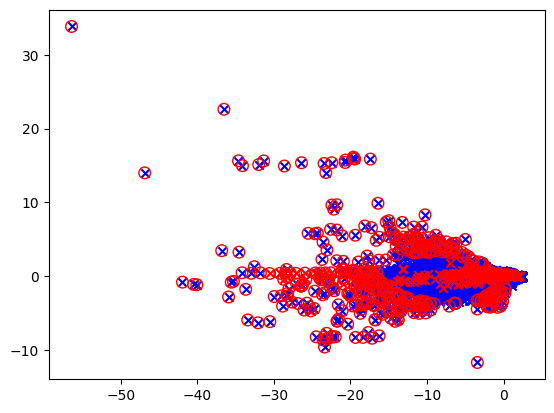

In [ ]:
sc_train_first, optimal_threshold_first, X_train_first=part3_two_features(1, 28, 4)
plt.scatter(X_V1_train_negative, X_V28_train_negative, c='blue', marker="x")
plt.scatter(X_V1_train_positive, X_V28_train_positive, c='red', marker="x")
outliers=np.nonzero(sc_train_first<optimal_threshold_first)[0]
plt.scatter(X_train_first[outliers, 0], X_train_first[outliers, 1], marker="o", facecolor="none", edgecolor="r", s=70)

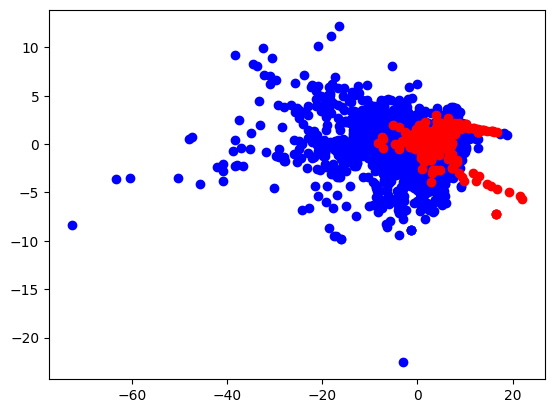

In [ ]:
#Pick V2 and V27
X_V2_train_negative=np.array(X_train.iloc[:,2][y_train==0]).reshape(-1, 1)
X_V27_train_negative=np.array(X_train.iloc[:,27][y_train==0]).reshape(-1, 1)
#print(X_train.iloc[:,14][y_train==1])
#print(X_train.iloc[:,14][y_train==0])
X_V2_train_positive=np.array(X_train.iloc[:,2][y_train==1]).reshape(-1, 1)
X_V27_train_positive=np.array(X_train.iloc[:,27][y_train==1]).reshape(-1, 1)

plt.scatter(X_V2_train_negative, X_V27_train_negative, c='blue')
plt.scatter(X_V2_train_positive, X_V27_train_positive, c='red')

3 components are needed since there are 3 clusters (one middle, one left and one bottom)

Part 3 ( 2 27 ): AUC for training set is  0.8725414570039617
Part 3 ( 2 27 ): AUC for validation set is  0.8687869634233739
Part 3 ( 2 27 ): the optimal threshold is -10.120636602896184
Part 3 ( 2 27 ): the F1 score is 0.07106598984771574


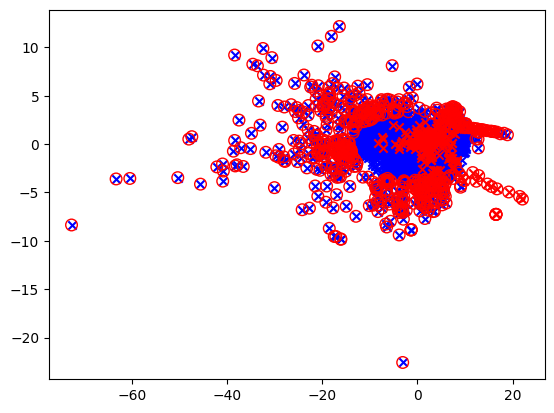

In [ ]:
sc_train_second, optimal_threshold_second, X_train_second=part3_two_features(2, 27, 3)
plt.scatter(X_V2_train_negative, X_V27_train_negative, c='blue', marker="x")
plt.scatter(X_V2_train_positive, X_V27_train_positive, c='red', marker="x")
outliers=np.nonzero(sc_train_second<optimal_threshold_second)[0]
plt.scatter(X_train_second[outliers, 0], X_train_second[outliers, 1], marker="o", facecolor="none", edgecolor="r", s=70)

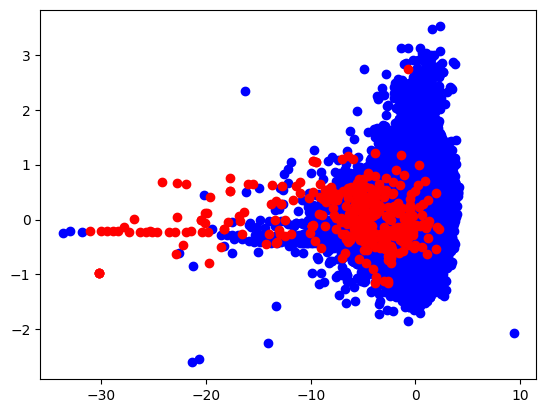

In [ ]:
#Pick V3 and V26
X_V3_train_negative=np.array(X_train.iloc[:,3][y_train==0]).reshape(-1, 1)
X_V26_train_negative=np.array(X_train.iloc[:,26][y_train==0]).reshape(-1, 1)
#print(X_train.iloc[:,14][y_train==1])
#print(X_train.iloc[:,14][y_train==0])
X_V3_train_positive=np.array(X_train.iloc[:,3][y_train==1]).reshape(-1, 1)
X_V26_train_positive=np.array(X_train.iloc[:,26][y_train==1]).reshape(-1, 1)

plt.scatter(X_V3_train_negative, X_V26_train_negative, c='blue')
plt.scatter(X_V3_train_positive, X_V26_train_positive, c='red')

4 components are needed since there are 4 clusters in the plot

Part 3 ( 3 26 ): AUC for training set is  0.8649290473733972
Part 3 ( 3 26 ): AUC for validation set is  0.8463047181458733
Part 3 ( 3 26 ): the optimal threshold is -9.642535369657327
Part 3 ( 3 26 ): the F1 score is 0.24778761061946905


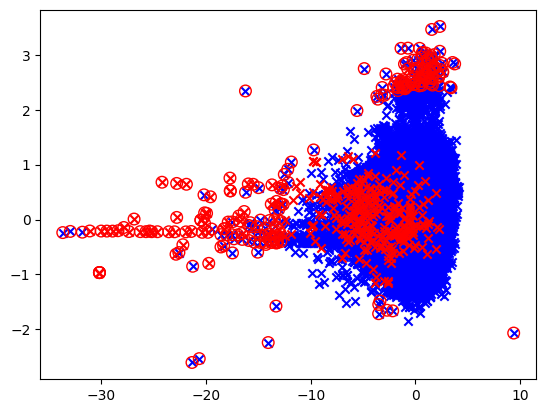

In [ ]:
sc_train_third, optimal_threshold_third, X_train_third=part3_two_features(3, 26, 4)
plt.scatter(X_V3_train_negative, X_V26_train_negative, c='blue', marker="x")
plt.scatter(X_V3_train_positive, X_V26_train_positive, c='red', marker="x")
outliers=np.nonzero(sc_train_third<optimal_threshold_third)[0]
plt.scatter(X_train_third[outliers, 0], X_train_third[outliers, 1], marker="o", facecolor="none", edgecolor="r", s=70)

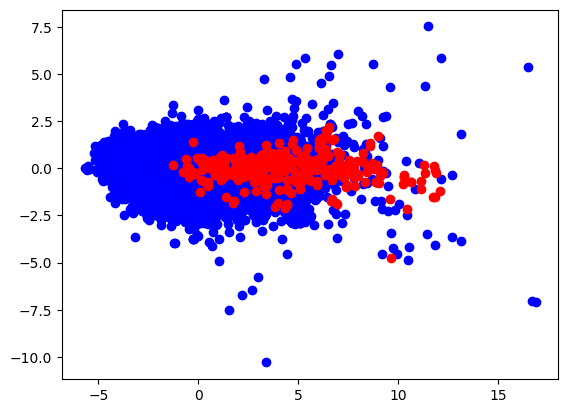

In [ ]:
#Pick V4 and V25
X_V4_train_negative=np.array(X_train.iloc[:,4][y_train==0]).reshape(-1, 1)
X_V25_train_negative=np.array(X_train.iloc[:,25][y_train==0]).reshape(-1, 1)
#print(X_train.iloc[:,14][y_train==1])
#print(X_train.iloc[:,14][y_train==0])
X_V4_train_positive=np.array(X_train.iloc[:,4][y_train==1]).reshape(-1, 1)
X_V25_train_positive=np.array(X_train.iloc[:,25][y_train==1]).reshape(-1, 1)

plt.scatter(X_V4_train_negative, X_V25_train_negative, c='blue')
plt.scatter(X_V4_train_positive, X_V25_train_positive, c='red')

4 components are needed since there are 4 clusters in the plot

Part 3 ( 4 25 ): AUC for training set is  0.8870837676744607
Part 3 ( 4 25 ): AUC for validation set is  0.8734422989193489
Part 3 ( 4 25 ): the optimal threshold is -10.319945762627611
Part 3 ( 4 25 ): the F1 score is 0.15625


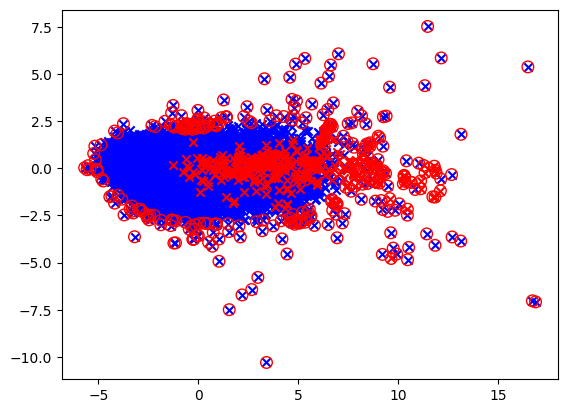

In [ ]:
sc_train_fourth, optimal_threshold_fourth, X_train_fourth=part3_two_features(4, 25, 4)
plt.scatter(X_V4_train_negative, X_V25_train_negative, c='blue', marker="x")
plt.scatter(X_V4_train_positive, X_V25_train_positive, c='red', marker="x")
outliers=np.nonzero(sc_train_fourth<optimal_threshold_fourth)[0]
plt.scatter(X_train_fourth[outliers, 0], X_train_fourth[outliers, 1], marker="o", facecolor="none", edgecolor="r", s=70)

## **Part 4: Single feature model with two Gaussian distributions. [2 Marks]**
Now we will use two different distributions for fraud and not-fraud transactions.
  1.  Fit a Gaussian distribution ($G_1$) on a feature of **not-fraud transactions** using ``sklearn.mixture.GaussianMixture`` when ``n_components=1``. **[0.25]**
  2. Fit another Gaussian distribution ($G_2$) on the same feature but for **fraud transactions** using ``sklearn.mixture.GaussianMixture`` when ``n_components=1``. **[0.25]**
  3. Compute the score samples ($S$) for both $G_1$ and $G_2$ on the **validation set** to get $S_1$ and $S_2$, respectively. **[0.25]**
  4. Find an optimal $c$ (a real number) that maximizes validation set F1 Score for a model such that if $S_1 < c \times S_2$, the transaction is classified as an anomaly. For example, if $c=1$ we could say that if $S_2$ is greater than $S_1$, ($S_1$<$S_2$) then the transaction is an anomaly (the transaction belongs to the $G_2$ distribution which represents fraud transactions). For start consider $c$ in $[0,10]$ with steps of 0.1, you can change this window in your experiments if needed. **[0.25]**
  5. Repeat the steps above for all the features. What is the best F1 Score that you get for training and validation? Which feature and what c? **[1]**

In [ ]:
C=np.linspace(0.1, 10, 100)
f1_max_part4_train=0
f1_max_part4_val=0
best_V_train=0
best_V_val=0
best_c_train=0
best_c_val=0

for j in range(1, 29):
  X_part4_train=np.array(X_train.iloc[:,j].values).reshape(-1,1)
  X_part4_val=np.array(X_val.iloc[:,j].values).reshape(-1,1)
  X_part4_train_negative=X_part4_train[y_train==0]
  X_part4_train_positive=X_part4_train[y_train==1]
  #Step 1 and 2
  G1=GaussianMixture(n_components=1)
  G1.fit(X_part4_train_negative)
  G2=GaussianMixture(n_components=1)
  G2.fit(X_part4_train_positive)
  #Step 3
  S1_val=G1.score_samples(X_part4_val)
  S2_val=G2.score_samples(X_part4_val)
  S1_train=G1.score_samples(X_part4_train)
  S2_train=G2.score_samples(X_part4_train)


  for c in C:
    curr_f1_val=f1_score(S1_val<c*S2_val, y_val)
    curr_f1_train=f1_score(S1_train<c*S2_train, y_train)

    if curr_f1_train>f1_max_part4_train:
      best_V_train=j
      best_c_train=c
      f1_max_part4_train=curr_f1_train

    if curr_f1_val>f1_max_part4_val:
      best_V_val=j
      best_c_val=c
      f1_max_part4_val=curr_f1_val


print("Part 4: the best F1 score for training set is", f1_max_part4_train)
print("Part 4: the feature is V", best_V_train)
print("Part 4: the c is ", best_c_train)


print("Part 4: the best F1 score for validation set is", f1_max_part4_val)
print("Part 4: the feature is V", best_V_val)
print("Part 4: the c is ", best_c_val)


Part 4: the best F1 score for training set is 0.6996699669966996
Part 4: the feature is V 12
Part 4: the c is  5.0
Part 4: the best F1 score for validation set is 0.6438356164383563
Part 4: the feature is V 14
Part 4: the c is  5.9


## **Part 5: Multivariate and Mixture of Gaussians Distribution [4 Marks]**
We now want to build an outlier detection model that performs well in terms of F1 score. To design your model, you can benefit from:

*   No restrictions on the number of features - use as few or as many as you want! (multivariate).
*   To fit your model, you can take advantage of the Gaussian mixture model, where you can set the number of components [help](https://scikit-learn.org/stable/modules/generated/sklearn.mixture.GaussianMixture.html).
*   You can choose to fit your Gaussians on not-fraud transactions or to both classes.


It is up to you how to design your model. Try at least 10 different models and report the AUC for both training and validation sets (if applicable) and the best F1 score for both training and validation sets for each model. What kind of model works better? How many features are best (and which ones)? How many Gaussians? How many components? Summarize your findings with tables or plots. **[4]**


**HINT !**

You might want to try a two-gaussian model, multiple features, a single component for the valid transaction, and multiple components for fraud ones! Why does it make sense to have multiple components for fraud transactions?

In [ ]:
def part5_fit_one_gaussian(features_list, num_components, if_only_non_fraud): # 1 for non-froud, 0 for both
  list_len=len(features_list)
  X_train_part5=np.array(X_train.iloc[:,features_list]).reshape(-1, list_len)
  X_val_part5=np.array(X_val.iloc[:,features_list]).reshape(-1, list_len)
  X_train_part5_negative=X_train_part5[y_train==0]
  #Step 5: Fit your Gaussian model on all the data points.
  gm=GaussianMixture(n_components=num_components)
  if if_only_non_fraud==1:
    gm.fit(X_train_part5_negative)
  else:
    gm.fit(X_train_part5)
  #Step 6: Compute AUC on both training and validation sets
  part5_score_train=gm.score_samples(X_train_part5)
  part5_score_val=gm.score_samples(X_val_part5)

  fpr_train, tpr_train, threshold_train=roc_curve(y_train, part5_score_train*-1)
  fpr_val, tpr_val, threshold_val=roc_curve(y_val, part5_score_val*-1)
  print("Part 5 (", features_list, "): AUC for training set is ", auc(fpr_train, tpr_train))
  print("Part 5 (", features_list, "): AUC for validation set is ", auc(fpr_val, tpr_val))


  sc_min=np.min(part5_score_train, axis=-1)
  sc_max=np.max(part5_score_train, axis=-1)

  possible_threshold=np.linspace(sc_min, sc_max, 100)

  f1_score_max_train=0
  f1_score_max_val=0
  optimal_threshold_val=0
  optimal_threshold_val, f1_score_max_val=find_maximum_f1_val(possible_threshold, part5_score_val)
  optimal_threshold_train, f1_score_max_train=find_maximum_f1_train(possible_threshold, part5_score_train)

  print("Part 5 (", features_list, "): the optimal threshold for training is" ,optimal_threshold_train)
  print("Part 5 (", features_list, "): the best F1 score for training is" , f1_score_max_train)
  print("Part 5 (", features_list, "): the optimal threshold for validation is" ,optimal_threshold_val)
  print("Part 5 (", features_list, "): the best F1 score for validation is" , f1_score_max_val)
  return f1_score_max_val


In [ ]:
def part5_fit_two_gaussian(features_list, num_components_positive, num_components_negative):
  f1_max_part5=0
  best_c=0
  list_len=len(features_list)
  X_train_part5=np.array(X_train.iloc[:,features_list]).reshape(-1, list_len)
  X_val_part5=np.array(X_val.iloc[:,features_list]).reshape(-1, list_len)
  X_part5_train_negative=X_train_part5[y_train==0]
  X_part5_train_positive=X_train_part5[y_train==1]
  #Step 1 and 2
  G1=GaussianMixture(n_components=num_components_negative)
  G1.fit(X_part5_train_negative)
  G2=GaussianMixture(n_components=num_components_positive)
  G2.fit(X_part5_train_positive)
  #Step 3
  S1_val=G1.score_samples(X_val_part5)
  S2_val=G2.score_samples(X_val_part5)
  S1_train=G1.score_samples(X_train_part5)
  S2_train=G2.score_samples(X_train_part5)



  for c in C:
    curr_f1=f1_score(S1_val<c*S2_val, y_val)

    if curr_f1>f1_max_part5:
      best_c=c
      f1_max_part5=curr_f1

  print("Part 5: the best F1 score is", f1_max_part5)
  print("Part 5: the c is ", best_c)
  return f1_max_part5



## **Model 1: best 3 features (V14, V12, V17), 1 component, fit on all transactions**

In [ ]:
f1_1=part5_fit_one_gaussian([14, 12, 17], 1, 0)

Part 5 ( [14, 12, 17] ): AUC for training set is  0.9587484152992161
Part 5 ( [14, 12, 17] ): AUC for validation set is  0.9535102740363183
Part 5 ( [14, 12, 17] ): the optimal threshold for training is -35.639990021161
Part 5 ( [14, 12, 17] ): the best F1 score for training is 0.7086834733893558
Part 5 ( [14, 12, 17] ): the optimal threshold for validation is -35.639990021161
Part 5 ( [14, 12, 17] ): the best F1 score for validation is 0.6666666666666666


## **Model 2: best 2 features (V14, V12), 1 component, fit on all transactions**

In [ ]:
f1_2=part5_fit_one_gaussian([14, 12], 1, 0)

Part 5 ( [14, 12] ): AUC for training set is  0.956719998295781
Part 5 ( [14, 12] ): AUC for validation set is  0.957666624247336
Part 5 ( [14, 12] ): the optimal threshold for training is -23.564426105607993
Part 5 ( [14, 12] ): the best F1 score for training is 0.6806136680613668
Part 5 ( [14, 12] ): the optimal threshold for validation is -27.192337357738495
Part 5 ( [14, 12] ): the best F1 score for validation is 0.6341463414634146


## **Model 3: best 1 feature (V14), 1 component, fit on all transactions**

In [ ]:
f1_3=part5_fit_one_gaussian([14], 1, 0)

Part 5 ( [14] ): AUC for training set is  0.9497395368699795
Part 5 ( [14] ): AUC for validation set is  0.9552970953177244
Part 5 ( [14] ): the optimal threshold for training is -21.174112099641945
Part 5 ( [14] ): the best F1 score for training is 0.6061538461538462
Part 5 ( [14] ): the optimal threshold for validation is -21.174112099641945
Part 5 ( [14] ): the best F1 score for validation is 0.6115702479338844


## **Model 4: best 3 features (V14, V12, V17), 1 component, fit on non-fraud transactions**

In [ ]:
f1_4=part5_fit_one_gaussian([14, 12, 17], 1, 1)

Part 5 ( [14, 12, 17] ): AUC for training set is  0.9585371855572531
Part 5 ( [14, 12, 17] ): AUC for validation set is  0.9525647694807055
Part 5 ( [14, 12, 17] ): the optimal threshold for training is -59.13249714257495
Part 5 ( [14, 12, 17] ): the best F1 score for training is 0.7363770250368189
Part 5 ( [14, 12, 17] ): the optimal threshold for validation is -70.50652792479332
Part 5 ( [14, 12, 17] ): the best F1 score for validation is 0.6902654867256637


## **Model 5: best 2 features (V14, V12), 1 component, fit on non-fraud transactions**

In [ ]:
f1_5=part5_fit_one_gaussian([14, 12], 1, 1)

Part 5 ( [14, 12] ): AUC for training set is  0.9575007684201982
Part 5 ( [14, 12] ): AUC for validation set is  0.9579311869151993
Part 5 ( [14, 12] ): the optimal threshold for training is -29.743962911933522
Part 5 ( [14, 12] ): the best F1 score for training is 0.6835443037974683
Part 5 ( [14, 12] ): the optimal threshold for validation is -43.782436509673175
Part 5 ( [14, 12] ): the best F1 score for validation is 0.6422018348623854


## **Model 6: best 2 features (V14), 1 component, fit on non-fraud transactions**

In [ ]:
f1_6=part5_fit_one_gaussian([14], 1, 1)

Part 5 ( [14] ): AUC for training set is  0.9498268427098526
Part 5 ( [14] ): AUC for validation set is  0.9560613874693298
Part 5 ( [14] ): the optimal threshold for training is -24.02900600948516
Part 5 ( [14] ): the best F1 score for training is 0.6070878274268104
Part 5 ( [14] ): the optimal threshold for validation is -26.35091044567494
Part 5 ( [14] ): the best F1 score for validation is 0.6218487394957983


## **Model 7: 5 features (V14, V12, V17, V10, V15), 1 component, fit on all transactions**

In [ ]:
f1_7=part5_fit_one_gaussian([14, 12, 17, 10, 15], 1, 0)

Part 5 ( [14, 12, 17, 10, 15] ): AUC for training set is  0.9624467263459455
Part 5 ( [14, 12, 17, 10, 15] ): AUC for validation set is  0.9519162002400785
Part 5 ( [14, 12, 17, 10, 15] ): the optimal threshold for training is -76.05100305184237
Part 5 ( [14, 12, 17, 10, 15] ): the best F1 score for training is 0.631578947368421
Part 5 ( [14, 12, 17, 10, 15] ): the optimal threshold for validation is -76.05100305184237
Part 5 ( [14, 12, 17, 10, 15] ): the best F1 score for validation is 0.5892857142857143


## **Model 8: best 3 features (V14, V12, V17), 2 component, fit on non-fraud transactions**

In [ ]:
f1_8=part5_fit_one_gaussian([14, 12, 17], 2, 1)

Part 5 ( [14, 12, 17] ): AUC for training set is  0.9629294138371123
Part 5 ( [14, 12, 17] ): AUC for validation set is  0.9534901806691389
Part 5 ( [14, 12, 17] ): the optimal threshold for training is -28.98190860326463
Part 5 ( [14, 12, 17] ): the best F1 score for training is 0.7275494672754946
Part 5 ( [14, 12, 17] ): the optimal threshold for validation is -24.365301492498475
Part 5 ( [14, 12, 17] ): the best F1 score for validation is 0.7050359712230216


## **Model 9: best 3 features (V14, V12, V17), 3 component, fit on non-fraud transactions**

In [ ]:
f1_9=part5_fit_one_gaussian([14, 12, 17], 3, 1)

Part 5 ( [14, 12, 17] ): AUC for training set is  0.9597651857913709
Part 5 ( [14, 12, 17] ): AUC for validation set is  0.9525510018031936
Part 5 ( [14, 12, 17] ): the optimal threshold for training is -32.10631978779992
Part 5 ( [14, 12, 17] ): the best F1 score for training is 0.6847133757961783
Part 5 ( [14, 12, 17] ): the optimal threshold for validation is -24.375324362535878
Part 5 ( [14, 12, 17] ): the best F1 score for validation is 0.6518518518518519


## **Model 10: best 3 features (V14, V12, V17), 4 component, fit on non-fraud transactions**

In [ ]:
f1_10=part5_fit_one_gaussian([14, 12, 17], 4, 1)

Part 5 ( [14, 12, 17] ): AUC for training set is  0.961327136524861
Part 5 ( [14, 12, 17] ): AUC for validation set is  0.9554526328636694
Part 5 ( [14, 12, 17] ): the optimal threshold for training is -17.802045991263128
Part 5 ( [14, 12, 17] ): the best F1 score for training is 0.7189349112426036
Part 5 ( [14, 12, 17] ): the optimal threshold for validation is -17.802045991263128
Part 5 ( [14, 12, 17] ): the best F1 score for validation is 0.6612903225806451


## **Model 11: best 3 features (V14, V12, V17), two gaussians, 1 component for G2, 2 components for G1**

In [ ]:
f1_11=part5_fit_two_gaussian([14, 12, 17], 1, 2)

Part 5: the best F1 score is 0.8
Part 5: the c is  3.6


## **Model 12: best 3 features (V14, V12, V17), two gaussians, 4 components for G2, 7 components for G1**

In [ ]:
f1_12=part5_fit_two_gaussian([14, 12, 17], 4, 7)

Part 5: the best F1 score is 0.7666666666666667
Part 5: the c is  1.9000000000000001


## **Plot**

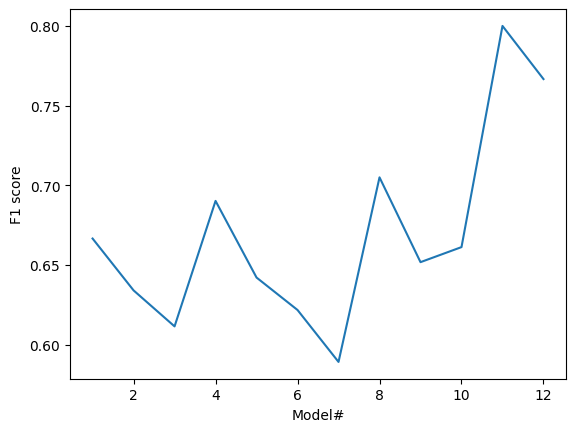

In [ ]:
x=np.array(range(1, 13))
y_f1=np.array([f1_1, f1_2, f1_3, f1_4, f1_5, f1_6,
        f1_7, f1_8, f1_9, f1_10, f1_11, f1_12])
plt.xlabel("Model#")
plt.ylabel('F1 score')
plt.plot(x, y_f1)
plt.show()

## **Part 6: Evaluating performance on test set: [1 Mark]**
**Which model worked better?** Pick your best model among all models and apply it to your test set. Report the F1 Score, Precision and Recall on the test set. **[1]**

**My best model is model 12 (from the plot of part 5), which selects 3 features (V14, V12, V17), two gaussians, 4 components for G2 and 7 components for G1**


In [ ]:
from sklearn.metrics import precision_score, recall_score
C=np.linspace(0.1, 10, 100)
f1_max_test=0
precision=0
recall=0
best_feature_list=[14, 12, 17]
best_list_len=len(best_feature_list)
best_c=0

X_train_part6=np.array(X_train.iloc[:,best_feature_list]).reshape(-1, best_list_len)
X_test_part6=np.array(X_test.iloc[:,best_feature_list]).reshape(-1, best_list_len)
X_train_part6_negative=X_train_part6[y_train==0]
X_train_part6_positive=X_train_part6[y_train==1]
#Step 1 and 2
G1=GaussianMixture(n_components=7)
G1.fit(X_train_part6_negative)
G2=GaussianMixture(n_components=4)
G2.fit(X_train_part6_positive)
#Step 3
S1_test=G1.score_samples(X_test_part6)
S2_test=G2.score_samples(X_test_part6)



for c in C:
  curr_f1=f1_score(S1_test<c*S2_test, y_test)

  if curr_f1>f1_max_test:
    best_c=c
    f1_max_test=curr_f1
    precision=precision_score(S1_test<c*S2_test, y_test)
    recall=recall_score(S1_test<c*S2_test, y_test)




print("Part 6: F1 score for test set is", f1_max_test)
print("Part 6: precision score for test set is", precision)
print("Part 6: recall score for test set is", recall)


Part 6: F1 score for test set is 0.7701863354037266
Part 6: precision score for test set is 0.8378378378378378
Part 6: recall score for test set is 0.7126436781609196


## **Part 7: Is Gaussian the only useful distribution? [1 Mark]**

Search for other distributions that could be used to model the data. How popular are they? Is there a specific situation where a distribution works better? How can we find a suitable distribution to model our data? Do not forget to include your references.




1. Binomial Distribution: It is commonly used and works better when you are modeling the number of successes in a fixed number of Bernoulli trials (e.g., number of heads in 10 coin flips)

2. Poisson Distribution: Quite common. It works better when modeling the number of times an event occurs in a fixed interval of time or space (e.g. number of emails received in an hour)

**In order to find a suitable distribution, we need to:**
1. plot the data: By visualizing the data, we can see the shape of trend of our data
2. Statistical Tests: Try different distributions and models in order to find the best distribution and the model by evaluating performance on the test set.


**Reference:**

Ross, S. M. (2014). Introduction to probability and statistics for engineers and scientists. Academic press.


Johnson, N. L., Kotz, S., & Balakrishnan, N. (1994). Continuous univariate distributions. Vol. 1. Wiley.


Casella, G., & Berger, R. L. (2002). Statistical inference. Pacific Grove, CA: Duxbury.